In [6]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded


In [7]:
date = "NOV05"
chainSGN = ROOT.TChain("events")
chainBKG = ROOT.TChain("events")

chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, 1039, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, "Phi3Cat"))

dfSGN = ROOT.RDataFrame(chainSGN)
dfBKG = ROOT.RDataFrame(chainBKG)

filter = "HCandMass > 100 && HCandMass < 160"
filter += " && !TMath::IsNaN(goodMeson_massErr[0]) && !TMath::IsNaN(sigmaHCandMass_Rel2)"

dfSGN = (dfSGN.Define("scale", "w*lumiIntegrated").Filter(filter))
dfBKG = (dfBKG.Define("scale", "w*lumiIntegrated").Filter(filter))

chainSGN_MVA = ROOT.TChain("TestTree")
chainSGN_MVA.Add("/data/submit/pdmonte/TMVA_disc/rootVars/disc_phi_GF_111_0.root/dataset/TestTree")
chainSGN_MVA.Add("/data/submit/pdmonte/TMVA_disc/rootVars/disc_phi_GF_111_1.root/dataset/TestTree")
chainSGN_MVA.Add("/data/submit/pdmonte/TMVA_disc/rootVars/disc_phi_GF_111_2.root/dataset/TestTree")
df_MVA = ROOT.RDataFrame(chainSGN_MVA)
dfSGN_MVA = (df_MVA.Filter("classID == 0"))
dfBKG_MVA = (df_MVA.Filter("classID == 1"))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


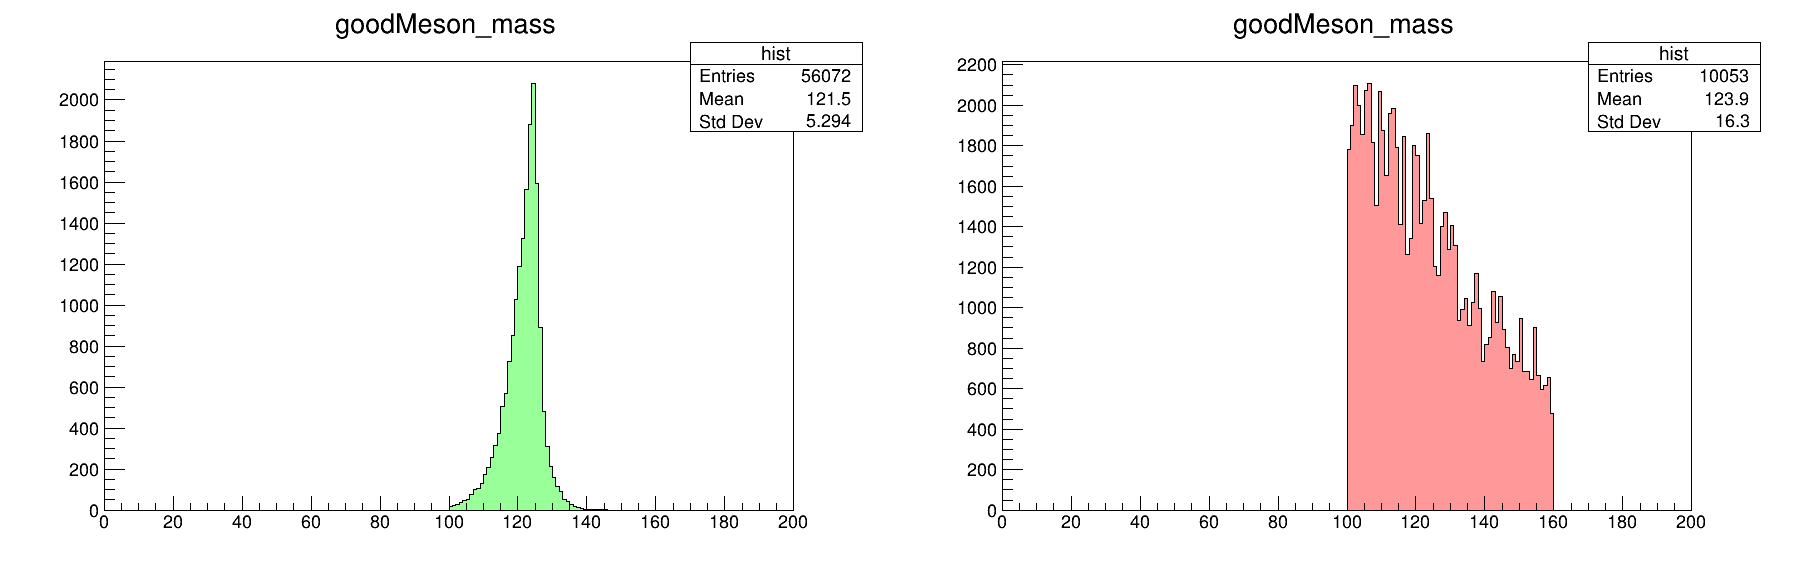

In [8]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0, 200

p = canvas.cd(1)
h = dfSGN.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.SetLineColor(ROOT.kBlack)
h.Draw("hist")

p = canvas.cd(2)
hb = dfBKG.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass", "scale")
hb.SetFillColor(ROOT.kRed-9)
hb.SetLineColor(ROOT.kBlack)
hb.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


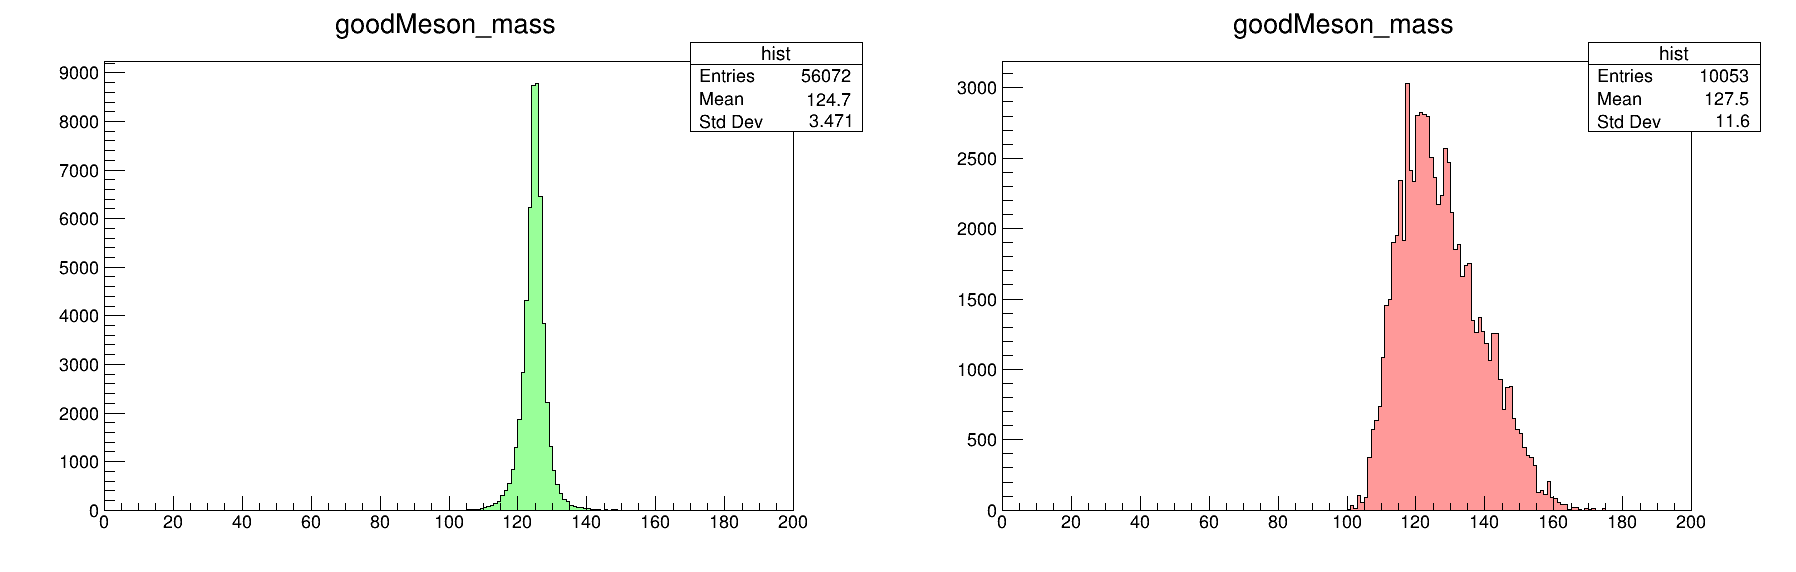

In [9]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0, 200

p = canvas.cd(1)
h = dfSGN_MVA.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.SetLineColor(ROOT.kBlack)
h.Draw("hist")

p = canvas.cd(2)
hb = dfBKG_MVA.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hb.SetFillColor(ROOT.kRed-9)
hb.SetLineColor(ROOT.kBlack)
hb.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


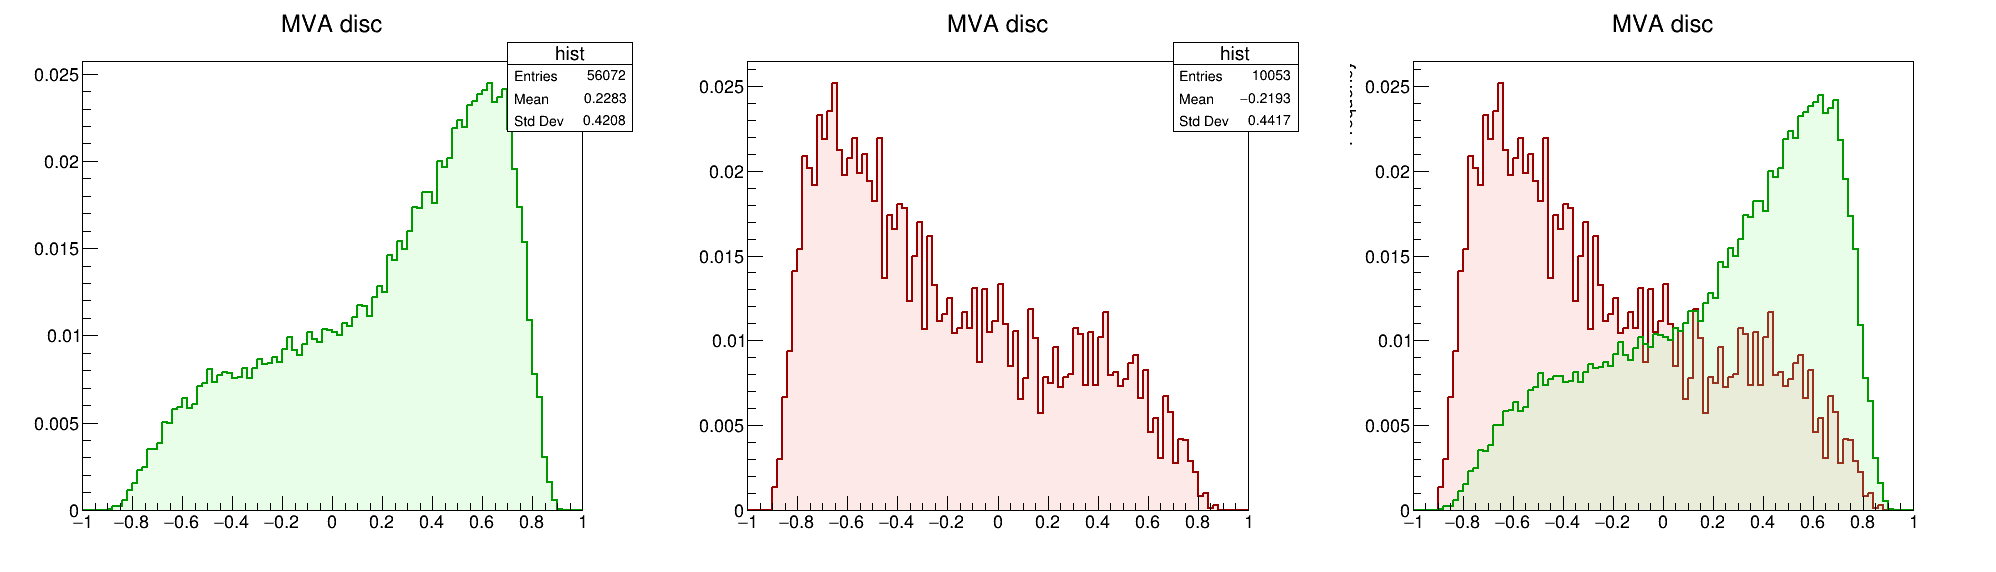

In [15]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 600)
canvas.Divide(3, 1)

nbins, xlow, xhigh = 100, -1, 1

p = canvas.cd(1)
hs = dfSGN_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG150", "scale")
hs.SetFillColorAlpha(ROOT.kGreen-9, 0.20)
hs.SetLineColor(ROOT.kGreen+2)
hs.SetLineWidth(2)
hs.SetFillStyle(4050)
hs.Draw("hist")

p = canvas.cd(2)
hb = dfBKG_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG150", "scale")
hb.SetFillColorAlpha(ROOT.kRed-9, 0.20)
hb.SetLineColor(ROOT.kRed+2)
hb.SetLineWidth(2)
hb.SetFillStyle(4050)
hb.Draw("hist")

p = canvas.cd(3)

hb.Scale(1/hb.Integral())
hs.Scale(1/hs.Integral())

stack = ROOT.THStack("stack", "MVA disc")
stack.Add(hb.GetValue())
stack.Add(hs.GetValue())
stack.Draw("hist nostack")
stack.GetYaxis().SetTitle("Frequency")

canvas.Draw()

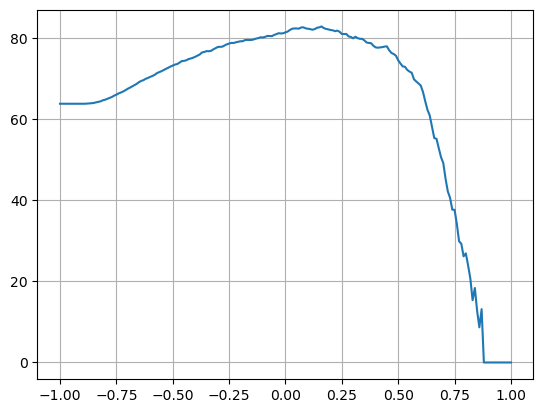

-1.0 63.87798303285975
0.16000000000000103 82.95506632398431
Significance improvement: 29.864880488338265	 Limit reduction: -22.996887515728393
sgnEff: 0.622079543427858
bkgEff: 0.22946074534836153


In [84]:
nbins, xlow, xhigh = 1000, -1, 1

hs = dfSGN_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG150", "scale")
hb = dfBKG_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG150", "scale")

#.Integral(h1.FindBin(xlow), h1.FindBin(xhigh))
nbins, xlow, xhigh = 100, -1, 1
step = 0.01
vals = np.arange(xlow, xhigh+step, step)
significances = []
significances_up = []
for v in vals:
    s = hs.Integral(hs.FindBin(v), hs.FindBin(xhigh))
    b = hb.Integral(hb.FindBin(v), hb.FindBin(xhigh))
    #print(v, s)
    #print(v, b)
    significances.append(0 if b == 0 else s/np.sqrt(b))
    #print(v, significances[-1])

plt.plot(vals, significances)
plt.grid()
plt.show()

print(vals[0], significances[0])
print(vals[significances.index(max(significances))], max(significances))
sigImpr =  max(significances)/significances[0]
print("Significance improvement: {}\t Limit reduction: {}".format((sigImpr-1)*100, (1/sigImpr-1)*100))
sgnEff = hs.Integral(hs.FindBin(vals[significances.index(max(significances))]), hs.FindBin(xhigh))/hs.Integral(hs.FindBin(xlow), hs.FindBin(xhigh))
bkgEff = hb.Integral(hb.FindBin(vals[significances.index(max(significances))]), hb.FindBin(xhigh))/hb.Integral(hb.FindBin(xlow), hb.FindBin(xhigh))
print("sgnEff: {}".format(sgnEff))
print("bkgEff: {}".format(bkgEff))
